In [56]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.model_selection import train_test_split
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input,decode_predictions
from keras.preprocessing import image
from keras.layers import Lambda, Dense, Flatten
from keras.models import Model
from glob import glob
import PIL
from PIL import Image
import os
import cv2
import random
import pickle

In [57]:
Train_path = './Chocolate Classification/Train' 
Test_path  = './Chocolate Classification/Test'
IMAGE_SIZE = [224,224]

In [58]:
Link = Train_path,Test_path

In [59]:
folder = glob('./Chocolate Classification/Train'), glob('./Chocolate Classification/Test')

In [60]:
Train_datagen = ImageDataGenerator(rescale=1./225, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
Test_datagen  = ImageDataGenerator(rescale = 1./225)

In [61]:
from matplotlib import testing
from matplotlib.colors import rgb2hex


training_set = Train_datagen.flow_from_directory('./Chocolate Classification/Train',
                                                    color_mode= 'rgb',
                                                    shuffle= True,
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')
testing_set = Test_datagen.flow_from_directory('./Chocolate Classification/Test',
                                                    color_mode= 'rgb',
                                                    shuffle= True,
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')
                                                

Found 94 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [62]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output) 
prediction = Dense(len(folder), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [63]:
vgg.input.shape

TensorShape([None, 224, 224, 3])

In [64]:
prediction.shape

TensorShape([None, 2])

In [65]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 
history = model.fit(training_set, validation_data=testing_set, epochs=12
                    
                    , batch_size=32
                    )

Epoch 1/12
3/3 [==============================] - 160s 59s/step - loss: 2.8004 - accuracy: 0.6064 - val_loss: 2.2483 - val_accuracy: 0.5000
Epoch 2/12
3/3 [==============================] - 113s 44s/step - loss: 2.2017 - accuracy: 0.5745 - val_loss: 4.4471 - val_accuracy: 0.5000
Epoch 3/12
3/3 [==============================] - 134s 46s/step - loss: 1.6099 - accuracy: 0.6596 - val_loss: 4.0476 - val_accuracy: 0.5000
Epoch 4/12
3/3 [==============================] - 117s 45s/step - loss: 2.0603 - accuracy: 0.5532 - val_loss: 1.2075 - val_accuracy: 0.6500
Epoch 5/12
3/3 [==============================] - 123s 46s/step - loss: 0.8421 - accuracy: 0.7021 - val_loss: 1.7175 - val_accuracy: 0.5000
Epoch 6/12
3/3 [==============================] - 126s 46s/step - loss: 0.6821 - accuracy: 0.7021 - val_loss: 1.4134 - val_accuracy: 0.6000
Epoch 7/12
3/3 [==============================] - 116s 40s/step - loss: 0.4141 - accuracy: 0.8404 - val_loss: 1.7121 - val_accuracy: 0.5500
Epoch 8/12
3/3 [====

In [66]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

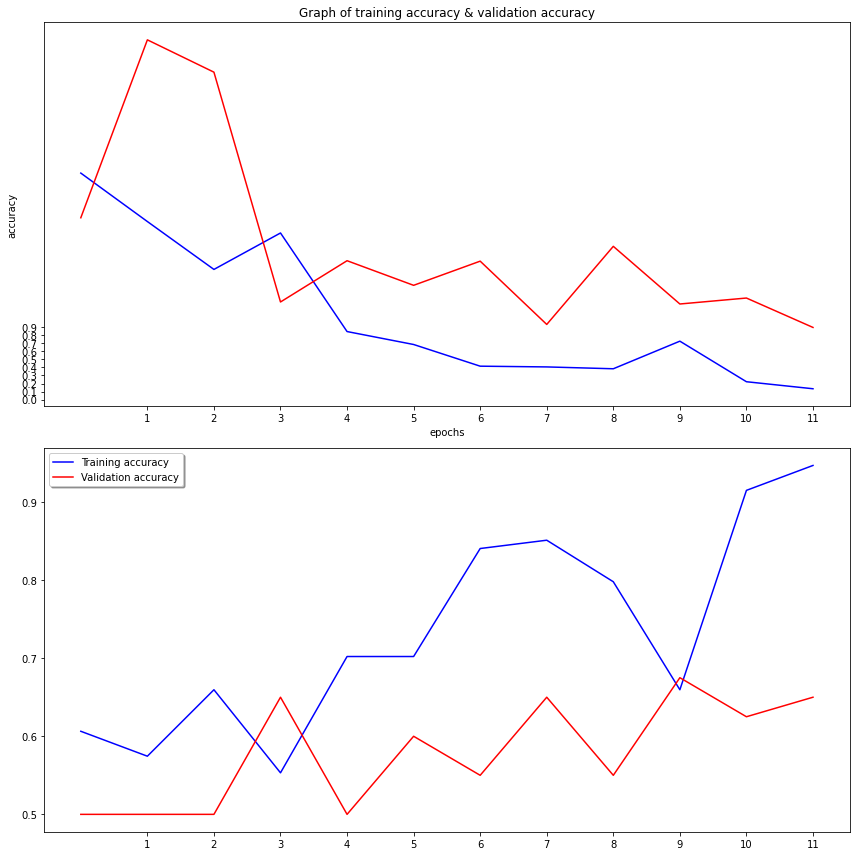

In [67]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# plot graph of training loss & validation loss
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 12, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.set_title("Graph of training loss & validation loss")

# plot graph of training accuracy & validation accuracy
ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 12, 1))
ax1.set_xlabel("epochs")
ax1.set_ylabel("accuracy")
ax1.set_title("Graph of training accuracy & validation accuracy")

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [68]:
from keras.models import load_model
model.save('model2.h5')